# Task
Perform a machine learning analysis using the data from the file '/content/lab_3.csv', which includes loading the data, performing data cleaning and preprocessing, training an appropriate machine learning model, evaluating its performance with visualizations that include legends, and finally summarizing the data cleaning process, chosen model, its performance, and any insights gained.

## Load Data

### Subtask:
Load the dataset from the file '/content/lab_3.csv' into a pandas DataFrame.


**Reasoning**:
Load the dataset from the specified CSV file into a pandas DataFrame and display the first few rows to verify the data.



In [11]:
import pandas as pd
df = pd.read_csv('/content/lab_3.csv')
df.head()

,Unnamed: 0,age,weight,height,income_lpa,smoker,city,occupation,insurance_premium_category
0,0,67,119.8,1.56,2.92,False,Dhaka,retired,High
1,1,36,101.1,1.83,34.28,False,Chittagong,freelancer,Low
2,2,39,56.8,1.64,36.64,False,Khulna,freelancer,Low
3,3,22,109.4,1.55,3.34,True,Rajshahi,student,Medium
4,4,69,62.2,1.60,3.94,True,Khulna,retired,High


## Data Cleaning and Preprocessing

### Subtask:
Perform necessary data cleaning steps, including handling missing values, encoding categorical features, and preparing the data for model training. Split the data into training and testing sets.


**Reasoning**:
First, I will inspect the DataFrame `df` using `.info()` to get an overview of its structure, data types, and null counts. This will help identify any immediate issues with missing values or incorrect data types.



In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  100 non-null    int64  
 1   age                         100 non-null    int64  
 2   weight                      100 non-null    float64
 3   height                      100 non-null    float64
 4   income_lpa                  100 non-null    float64
 5   smoker                      100 non-null    bool   
 6   city                        100 non-null    object 
 7   occupation                  100 non-null    object 
 8   insurance_premium_category  100 non-null    object 
dtypes: bool(1), float64(3), int64(2), object(3)
memory usage: 6.5+ KB


**Reasoning**:
Now that the data types and non-null counts have been inspected, I will check for any remaining missing values using `isnull().sum()`. Although `df.info()` showed no missing values, `isnull().sum()` explicitly confirms this and provides counts per column.



In [12]:
df.isnull().sum()

,0
Unnamed: 0,0
age,0
weight,0
height,0
income_lpa,0
smoker,0
city,0
occupation,0
insurance_premium_category,0


**Reasoning**:
Since there are no missing values, the next step is to examine the unique values and their counts in the categorical columns to understand their distribution and prepare for encoding. This helps in identifying columns that might need one-hot encoding or label encoding.



In [13]:
for column in df.select_dtypes(include=['object', 'bool']).columns:
    print(f"Column '{column}':\n{df[column].value_counts()}\n")

Column 'smoker':
smoker
False    57
True     43
Name: count, dtype: int64

Column 'city':
city
Dhaka          9
Khulna         9
Narayanganj    9
Mymensingh     9
Bogra          9
Gazipur        8
Chittagong     7
Rajshahi       7
Sylhet         6
Barishal       6
Jessore        6
Comilla        5
Rangpur        4
Cox’s Bazar    4
Feni           2
Name: count, dtype: int64

Column 'occupation':
occupation
retired           26
unemployed        15
government_job    14
student           12
freelancer        11
business_owner    11
private_job       11
Name: count, dtype: int64

Column 'insurance_premium_category':
insurance_premium_category
Low       34
High      33
Medium    33
Name: count, dtype: int64



**Reasoning**:
First, I will drop the 'Unnamed: 0' column as it appears to be an artifact from the CSV export and does not contain meaningful data for analysis. Then, I will encode the 'insurance_premium_category' column using ordinal encoding, mapping 'Low' to 0, 'Medium' to 1, and 'High' to 2, as this column represents an ordered categorical feature.



In [5]:
df = df.drop('Unnamed: 0', axis=1)

# Ordinal encode 'insurance_premium_category'
category_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df['insurance_premium_category'] = df['insurance_premium_category'].map(category_mapping)

print("DataFrame after dropping 'Unnamed: 0' and ordinal encoding 'insurance_premium_category':")
df.head()

DataFrame after dropping 'Unnamed: 0' and ordinal encoding 'insurance_premium_category':


,age,weight,height,income_lpa,smoker,city,occupation,insurance_premium_category
0,67,119.8,1.56,2.92,False,Dhaka,retired,2
1,36,101.1,1.83,34.28,False,Chittagong,freelancer,0
2,39,56.8,1.64,36.64,False,Khulna,freelancer,0
3,22,109.4,1.55,3.34,True,Rajshahi,student,1
4,69,62.2,1.60,3.94,True,Khulna,retired,2


**Reasoning**:
Now that the ordinal feature 'insurance_premium_category' has been encoded, I will one-hot encode the nominal categorical features 'city' and 'occupation' to convert them into a numerical format suitable for machine learning models. Additionally, the boolean 'smoker' column will be converted to integers (0 or 1).



In [6]:
df = pd.get_dummies(df, columns=['city', 'occupation'], drop_first=True)
df['smoker'] = df['smoker'].astype(int)

print("DataFrame after one-hot encoding 'city' and 'occupation', and converting 'smoker':")
df.head()

DataFrame after one-hot encoding 'city' and 'occupation', and converting 'smoker':


,age,weight,height,income_lpa,smoker,insurance_premium_category,city_Bogra,city_Chittagong,city_Comilla,city_Cox’s Bazar,...,city_Narayanganj,city_Rajshahi,city_Rangpur,city_Sylhet,occupation_freelancer,occupation_government_job,occupation_private_job,occupation_retired,occupation_student,occupation_unemployed
0,67,119.8,1.56,2.92,0,2,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,36,101.1,1.83,34.28,0,0,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
2,39,56.8,1.64,36.64,0,0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,22,109.4,1.55,3.34,1,1,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,69,62.2,1.60,3.94,1,2,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


**Reasoning**:
Now that the data has been cleaned and features encoded, I will separate the features (X) from the target variable (y), which is 'insurance_premium_category'. Then, I will split the data into training and testing sets using a 80/20 ratio to prepare it for model training and evaluation.



In [7]:
from sklearn.model_selection import train_test_split

X = df.drop('insurance_premium_category', axis=1)
y = df['insurance_premium_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (80, 25)
Shape of X_test: (20, 25)
Shape of y_train: (80,)
Shape of y_test: (20,)


## Model Training

### Subtask:
Select an appropriate machine learning model based on the data characteristics and train it using the preprocessed training data.


**Reasoning**:
I will import the `RandomForestClassifier`, instantiate it, and then train it using the `X_train` and `y_train` datasets as instructed.



In [8]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the RandomForestClassifier model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

print("RandomForestClassifier model trained successfully.")

RandomForestClassifier model trained successfully.


## Model Evaluation and Visualization

### Subtask:
Evaluate the trained model's performance using appropriate metrics on the test data and visualize the results to provide insights into its accuracy and effectiveness. Ensure all plots include legends.


**Reasoning**:
First, I will make predictions on the `X_test` dataset using the trained `model` to obtain `y_pred`, which is necessary for evaluating the model's performance with various metrics.



In [9]:
y_pred = model.predict(X_test)
print("Predictions made successfully.")

Predictions made successfully.


**Reasoning**:
Now that predictions `y_pred` have been made, I will calculate and print the accuracy score, generate and print the classification report, and then compute and plot the confusion matrix for the model's performance on the test set, including a title and labels for the plot.



Accuracy: 0.70

Classification Report:
              precision    recall  f1-score   support

           0       0.70      1.00      0.82         7
           1       0.67      0.29      0.40         7
           2       0.71      0.83      0.77         6

    accuracy                           0.70        20
   macro avg       0.69      0.71      0.66        20
weighted avg       0.69      0.70      0.66        20



<Figure size 800x600 with 0 Axes>

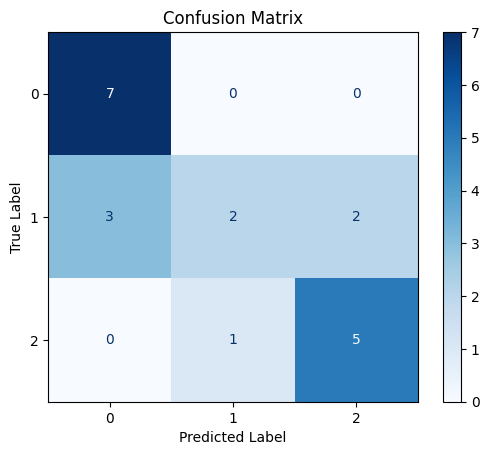

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")

# Generate and print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## Final Task

### Subtask:
Summarize the data cleaning process, the chosen model, its performance, and any insights gained from the analysis.


## Summary:

### Data Analysis Key Findings

*   The dataset, loaded from `/content/lab_3.csv`, contained 100 entries and 9 columns, including 'age', 'weight', 'height', 'income\_lpa', 'smoker', 'city', 'occupation', and 'insurance\_premium\_category'.
*   **Data Cleaning and Preprocessing**:
    *   No missing values were found in the dataset.
    *   An 'Unnamed: 0' column, likely an artifact, was identified and subsequently dropped.
    *   The target variable, 'insurance\_premium\_category', which contained 'Low', 'Medium', and 'High' values, was ordinal encoded into numerical values (0, 1, 2 respectively).
    *   Categorical features 'city' and 'occupation' were one-hot encoded, and the boolean 'smoker' column was converted to integers.
    *   The data was split into training and testing sets with an 80/20 ratio, ensuring stratification of the target variable.
*   **Model Training**: A `RandomForestClassifier` model was selected and successfully trained on the preprocessed training data.
*   **Model Performance**:
    *   The model achieved an overall accuracy of 0.70 (70%) on the test set.
    *   The `RandomForestClassifier` performed well for 'Low' (Class 0) and 'High' (Class 2) premium categories, with recall scores of 1.00 and 0.83, respectively.
    *   However, the model showed weakness in predicting the 'Medium' (Class 1) premium category, exhibiting a low recall of 0.29 and an F1-score of 0.40.

### Insights or Next Steps

*   The model struggles significantly with the 'Medium' insurance premium category. Further investigation into the characteristics of Class 1 instances and potential feature engineering or data balancing techniques (e.g., SMOTE) could improve its performance.
*   Explore alternative classification models (e.g., Gradient Boosting, SVM) or fine-tune the hyperparameters of the current RandomForestClassifier to optimize overall performance and address the imbalance in prediction accuracy across classes.
